# Figure S3
## Tidbit processing: Floodplain transect stations and control location

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import date, time, datetime
import seaborn as sns

### First import and prepare the data

In [2]:
# import csv data
fpt1_1_raw = pd.read_csv('../Field_Data/Tidbit_files/FPT1_1.csv')
fpt1_3_raw = pd.read_csv('../Field_Data/Tidbit_files/FPT1_3.csv')
air_raw = pd.read_csv('../Field_Data/Tidbit_files/Control.csv')

In [3]:
# Write function to read in and prepare the data
def tidbit_data(df):
    df['DateTime_GMT'] = pd.to_datetime(df['Date Time, GMT+00:00'])
    df['DateTime_MT'] = df.DateTime_GMT - pd.Timedelta(hours=6)
    df = df.rename(columns={"Temp, °C": "Temp (°C)"})
    df = df.drop(columns=['#'])
    df = df[285:]
    return df

In [4]:
# Run function and preview data from FPT1-1
fpt1_1 = tidbit_data(fpt1_1_raw)
fpt1_1.head()

,"Date Time, GMT+00:00",Temp (°C),DateTime_GMT,DateTime_MT
285,3/22/22 22:45,18.675,2022-03-22 22:45:00,2022-03-22 16:45:00
286,3/22/22 23:00,17.629,2022-03-22 23:00:00,2022-03-22 17:00:00
287,3/22/22 23:15,16.153,2022-03-22 23:15:00,2022-03-22 17:15:00
288,3/22/22 23:30,14.529,2022-03-22 23:30:00,2022-03-22 17:30:00
289,3/22/22 23:45,13.353,2022-03-22 23:45:00,2022-03-22 17:45:00


In [5]:
# Run function and preview data from FPT1-3
fpt1_3 = tidbit_data(fpt1_3_raw)
fpt1_3.head()

,"Date Time, GMT+00:00",Temp (°C),DateTime_GMT,DateTime_MT
285,3/22/22 22:45,22.154,2022-03-22 22:45:00,2022-03-22 16:45:00
286,3/22/22 23:00,23.785,2022-03-22 23:00:00,2022-03-22 17:00:00
287,3/22/22 23:15,22.106,2022-03-22 23:15:00,2022-03-22 17:15:00
288,3/22/22 23:30,15.963,2022-03-22 23:30:00,2022-03-22 17:30:00
289,3/22/22 23:45,13.762,2022-03-22 23:45:00,2022-03-22 17:45:00


In [6]:
# Run function and preview data from the control location
air = tidbit_data(air_raw)
air.head()

,"Date Time, GMT+00:00",Temp (°C),DateTime_GMT,DateTime_MT
285,3/22/22 22:45,22.848,2022-03-22 22:45:00,2022-03-22 16:45:00
286,3/22/22 23:00,21.246,2022-03-22 23:00:00,2022-03-22 17:00:00
287,3/22/22 23:15,17.320,2022-03-22 23:15:00,2022-03-22 17:15:00
288,3/22/22 23:30,13.618,2022-03-22 23:30:00,2022-03-22 17:30:00
289,3/22/22 23:45,12.630,2022-03-22 23:45:00,2022-03-22 17:45:00


### Next plot the raw data, with measurements taken every 15 minutes

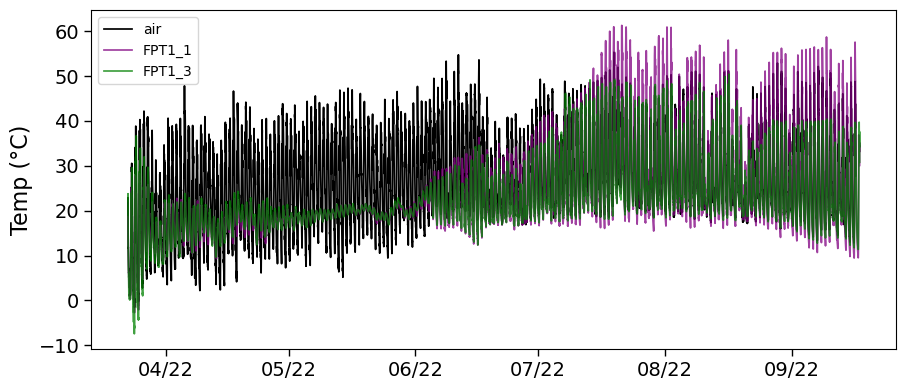

In [7]:
# Plot the raw data

# Build figure
fig, ax = plt.subplots(1,1, figsize=(9, 4))

# PLot data
ax.plot(air['DateTime_MT'], air['Temp (°C)'], label='air', color='k', linewidth=1.25)
ax.plot(fpt1_1['DateTime_MT'], fpt1_1['Temp (°C)'], label='FPT1_1', alpha=0.75, linewidth=1.25, color = 'purple')
ax.plot(fpt1_3['DateTime_MT'], fpt1_3['Temp (°C)'], label='FPT1_3', alpha=0.75, linewidth=1.25, color='green')
ax.legend()

# Format figure
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(labelsize=14, length=5, width=1)
ax.set_ylabel('Temp (°C)', size=16)
ax.yaxis.set_tick_params(labelsize=14, length=5, width=1)
plt.tight_layout()
plt.show()

It's great to view the raw data, but let's resample the data so that it's easier to see the trends. Resampling changes the resolution of the data. In this case, the temporal resolution is too fine. Next, we will take the mean, max, and min temperature from the 15-minute raw data for each day.

### Resample data 

In [8]:
# Write function to calculate mean temperature for each day
def resamp_mean(df):
    df = df.set_index(['DateTime_MT'])
    df = df.resample('D').mean()
    return df

# Implement function
fpt1_1_rmean = resamp_mean(fpt1_1)
fpt1_3_rmean = resamp_mean(fpt1_3)
air_rmean = resamp_mean(air)

In [9]:
# Write function to calculate the min temperature for each day
def resamp_min(df):
    df = df.set_index(['DateTime_MT'])
    df = df.resample('D').min()
    return df

# Implement function
fpt1_1_rmin = resamp_min(fpt1_1)
fpt1_3_rmin = resamp_min(fpt1_3)
air_rmin = resamp_min(air)

In [10]:
# Write function to calculate the max temperature for each day
def resamp_max(df):
    df = df.set_index(['DateTime_MT'])
    df = df.resample('D').max()
    return df

# Implement function
fpt1_1_rmax = resamp_max(fpt1_1)
fpt1_3_rmax = resamp_max(fpt1_3)
air_rmax = resamp_max(air)

Now that we have resampled the data by day, let's take the daily temperature range at each site. 

In [11]:
# Write function to calculate daily temperature range at each site
def resamp_range(dfmax, dfmin):
    df = pd.DataFrame()
    df['Temp Range'] = dfmax['Temp (°C)'] - dfmin['Temp (°C)']
    return df

# Implement function
fpt1_1_rrange = resamp_range(fpt1_1_rmax, fpt1_1_rmin)
fpt1_3_rrange = resamp_range(fpt1_3_rmax, fpt1_1_rmin)
air_rrange = resamp_range(air_rmax, air_rmin)

### Plot temperature range

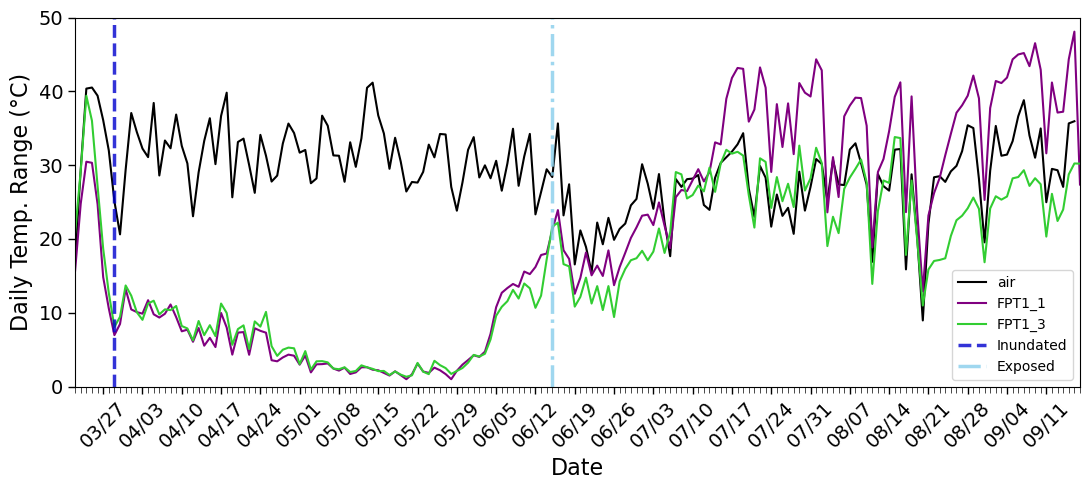

In [12]:
# Build figure
fig, ax = plt.subplots(1,1, figsize=(11, 5))

# Add data
ax.plot(air_rrange, label='air', color='k')
ax.plot(fpt1_1_rrange, label='FPT1_1', color='purple')
ax.plot(fpt1_3_rrange, label='FPT1_3', color='limegreen')

# Add verticle lines to show when inundation began and ended
plt.axvline(pd.Timestamp('2022-03-29'), color = 'mediumblue', linestyle = '--', label = 'Inundated', linewidth=2.5, alpha=0.8)
plt.axvline(pd.Timestamp('2022-06-15'), color = 'skyblue', linestyle = '-.', label = 'Exposed', linewidth=2.5, alpha=0.8)

# Build legend
ax.legend()

# Format figure
ax.set_xlabel('Date', size=16)
ax.set_ylabel('Daily Temp. Range (°C)', size=16)

date_form = DateFormatter("%m/%d")
left = date(2022, 3, 22)
right = date(2022, 9, 17)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)), ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_tick_params(which='minor', length=4, width=0.5)
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(labelsize=14, length=5, width=1, rotation=45)
ax.yaxis.set_tick_params(labelsize=14, length=5, width=1)
ax.yaxis.set_tick_params(labelsize=14, length=5, width=1)
ax.set_ylim(0,50)
plt.gca().set_xbound(left, right)
plt.tight_layout()

plt.savefig('Saved_Figures/FigS3', dpi=150)
plt.show()

The daily temperature range informs when the tidbit is inundated by water or exposed to air. Daily air temperature fluctuates much more than daily water temperature. Thus, the tidbits inundated by water experienced a sheltering effect, such that they did not record as large of daily temperature fluctuations, unlike the control tidbit.